<a href="https://colab.research.google.com/github/amirarasteh1990/Examples/blob/main/Hydesign_SolarX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install HyDesign**

In [1]:
!pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/hydesign.git@solarX

  Cloning https://gitlab.windenergy.dtu.dk/TOPFARM/hydesign.git (to revision solarX) to /tmp/pip-req-build-gxr8skvc
  Running command git clone --filter=blob:none --quiet https://gitlab.windenergy.dtu.dk/TOPFARM/hydesign.git /tmp/pip-req-build-gxr8skvc
  Running command git checkout -b solarX --track origin/solarX
  Switched to a new branch 'solarX'
  Branch 'solarX' set up to track remote branch 'solarX' from 'origin'.
  Resolved https://gitlab.windenergy.dtu.dk/TOPFARM/hydesign.git to commit f5a8d5b2557a7583026c419164a42971dc5704a0
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 82.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 643.4/643.4 kB 30.7 MB/s eta 0:00:00
  Installing build dependencies ... done

In [2]:
import time
import yaml
import numpy as np
import pandas as pd
from hydesign.assembly.hpp_assembly_solarX import hpp_model_solarX as hpp_model
from hydesign.examples import examples_filepath

In [3]:
examples_sites = pd.read_csv(f'{examples_filepath}examples_sites.csv', index_col=0, sep=';')

Load data of the site

In [4]:
name = 'Denmark_good_solar'
ex_site = examples_sites.loc[examples_sites.name == name]

# Extract geographical information of the selected site
longitude = ex_site['longitude'].values[0]
latitude = ex_site['latitude'].values[0]
altitude = ex_site['altitude'].values[0]

In [5]:
# Load simulation parameters from a YAML file
input_ts_fn = examples_filepath + "solarX/input_ts_Denmark_good_solar.csv"
sim_pars_fn = examples_filepath + "solarX/hpp_pars.yml"
with open(sim_pars_fn) as file:
    sim_pars = yaml.load(file, Loader=yaml.FullLoader)

In [6]:
# Initialize the Hybrid Power Plant (HPP) model
batch_size = 1 * 24 # the result presented in the slides is for a batch_size of 30 * 24
hpp = hpp_model(
    latitude, longitude, altitude,  # Geographical data for the site
    work_dir='./',  # Directory for saving outputs
    sim_pars_fn=sim_pars_fn,  # Simulation parameters
    input_ts_fn=input_ts_fn,  # Input time series (weather, prices, etc.)
    batch_size=batch_size,
)


Fixed parameters on the site
-------------------------------
longitude = 11.813965
latitude = 55.39776
altitude = 42.0


Set values of the sizing variables

In [7]:
# sf
area_sf = 1e5
tower_height = 20

# cpv
cpv_receiver_height_ratio = 0.98
cpv_dc_ac_ratio = 1
area_cpv_receiver_m2 = 1

# cst
cst_receiver_height_ratio = 1
heat_exchanger_capacity = 1e3
p_rated_st = 10
cold_pump_rated_power = 1e6
v_molten_salt_tank_m3 = 1e3
hot_pump_rated_power = 1e6
area_cst_receiver_m2 = 1

# bigas_h2
h2_receiver_height_ratio = 0.96
area_dni_reactor_biogas_h2 = 1
area_el_reactor_biogas_h2 = 1

Initialize and evaluate the HPP model

In [8]:
start = time.time()

x = [
    # sizing variables
    # sf
    area_sf,
    tower_height,

    # cpv
    cpv_receiver_height_ratio,
    cpv_dc_ac_ratio,
    area_cpv_receiver_m2,

    # cst
    cst_receiver_height_ratio,
    heat_exchanger_capacity,
    p_rated_st,
    cold_pump_rated_power,
    v_molten_salt_tank_m3,
    hot_pump_rated_power,
    area_cst_receiver_m2,

    # bigas_h2
    h2_receiver_height_ratio,
    area_dni_reactor_biogas_h2,
    area_el_reactor_biogas_h2,
]
outs = hpp.evaluate(*x)  # Run the model evaluation

hpp.print_design(x, outs)

end = time.time()

print(f'Execution time [min]:', round((end - start) / 60, 2))


Design:
---------------
area_sf: 100000.000
tower_height: 20.000
cpv_receiver_height_ratio: 0.980
cpv_dc_ac_ratio: 1.000
area_cpv_receiver_m2: 1.000
cst_receiver_height_ratio: 1.000
heat_exchanger_capacity: 1000.000
p_rated_st: 10.000
cold_pump_rated_power: 1000000.000
v_molten_salt_tank_m3: 1000.000
hot_pump_rated_power: 1000000.000
area_cst_receiver_m2: 1.000
h2_receiver_height_ratio: 0.960
area_dni_reactor_biogas_h2: 1.000
area_el_reactor_biogas_h2: 1.000

Outputs:
---------------
NPV_over_CAPEX: 0.045
NPV [MEuro]: 0.454
IRR: 0.064
LCOE [Euro/MWh]: 90.926
LCOVE [Euro/MWh]: 21.289
COVE [Euro/MWh]: 1.665
Revenues [MEuro]: 0.478
CAPEX [MEuro]: 10.182
OPEX [MEuro]: 0.000
SF CAPEX [MEuro]: 0.300
SF OPEX [MEuro]: 0.000
CPV CAPEX [MEuro]: 0.224
CPV OPEX [MEuro]: 0.000
CST CAPEX [MEuro]: 6.541
CST OPEX [MEuro]: 0.000
Shared CAPEX [MEuro]: 3.117
Shared Opex [MEuro]: 0.000
penalty lifetime [MEuro]: 0.000
AEP [GWh]: 8.760
GUF: 0.100
Break-even PPA price el [Euro/MWh]: 36.940
Break-even PPA pr

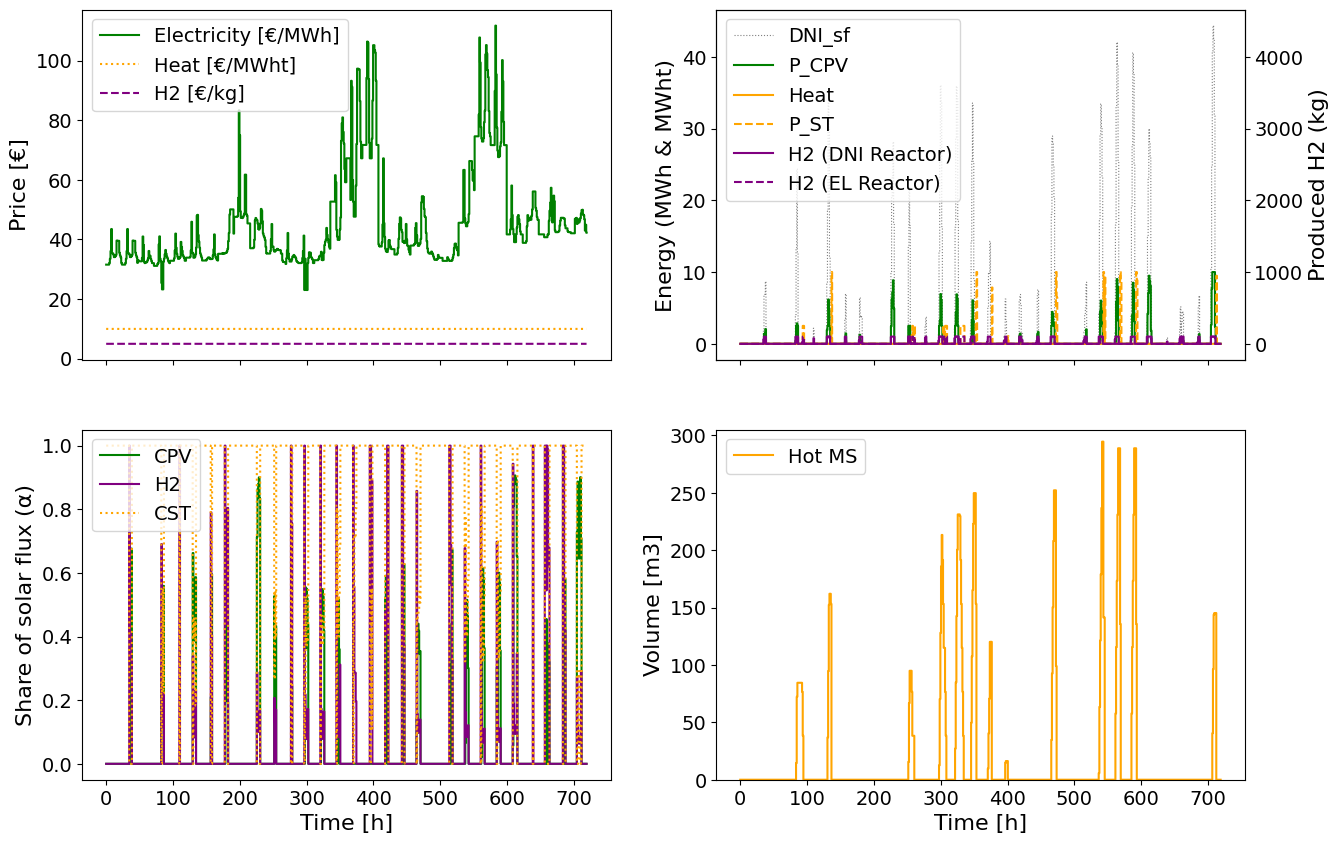

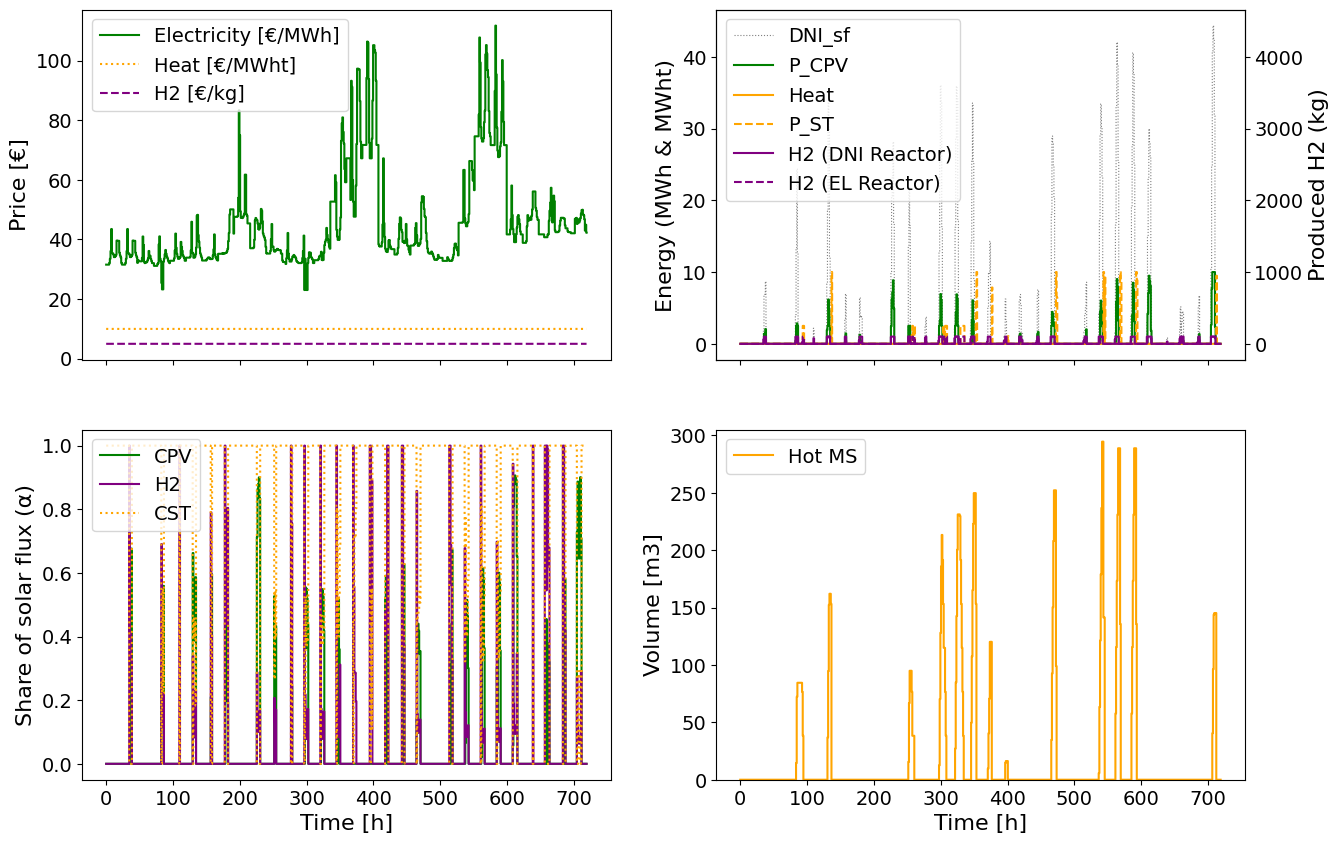

In [9]:
hpp.plot_solarX_results(n_hours=batch_size*30)